
# Breast Cancer Wisconsin (Diagnostic) Data Set

references:http://simonjaeger.com/visualizing-breast-cancer-wisconsin-diagnostic-data-set/

refrences: https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set

refrences: https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
# see complete dataset without skipping columns
from pandas.tools.plotting import table
pd.set_option('display.max_columns', None)  

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
import plotly
import plotly.graph_objs as go

In [5]:
dt = load_breast_cancer()

In [6]:
dt.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [7]:
print(dt.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [8]:
df = pd.DataFrame(dt.data, columns=dt.feature_names)
df['target']=dt['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# scale of each column is different, Let's standardize
scalar=StandardScaler()
scalar.fit(df)
preprocessed_data=scalar.transform(df)

In [10]:
# from 30 to 3 for 3d viz
pca=PCA(n_components=3)
pca.fit(preprocessed_data)
decomposed_data=pca.transform(preprocessed_data)

In [11]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[ 0.44896035  0.18472104  0.09183385]


0.72551524524594335

In [12]:
decomposed_df=pd.DataFrame(decomposed_data,columns=['x','y','z'])
decomposed_df.head(3)

,x,y,z
0,9.225770,2.116196,-0.948109
1,2.655802,-3.784776,-0.502825
2,5.892492,-1.005579,-0.487149


In [13]:
decomposed_df['malignant']=1-dt.target
# let's put malignant as 1
# let's put benign as 0

In [14]:
malignant=decomposed_df[decomposed_df['malignant']==1]
benign=decomposed_df[decomposed_df['malignant']==0]

In [15]:
len(malignant)

212

In [16]:
# Create line style.

line_style=dict(color='rgba(0,0,0,0.14)',width=0.5)

In [17]:
malignant_scatter=go.Scatter3d(x=malignant['x'],
                               y=malignant['y'],
                               z=malignant['z'],
                               mode='markers',
                               marker=dict(color='rgb(181,20,37)',
                               size=12,opacity=0.8,line=line_style),name='Malignant')

benign_scatter=go.Scatter3d(x=benign['x'],
                               y=benign['y'],
                               z=benign['z'],
                               mode='markers',
                               marker=dict(color='rgb(5, 99, 226)',
                               size=12,opacity=0.8,line=line_style),name='Benign')

In [18]:
# Create data array. Ensure malignant scatter is rendered above (can we merge layers somehow?).
data = [malignant_scatter,benign_scatter]
 
# Create layout.
layout = go.Layout(showlegend=True, margin=dict(l=0,r=0,b=0,t=0))
 
# Render (offline).
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter')

In [19]:
features_mean=list(df.columns[0:10])

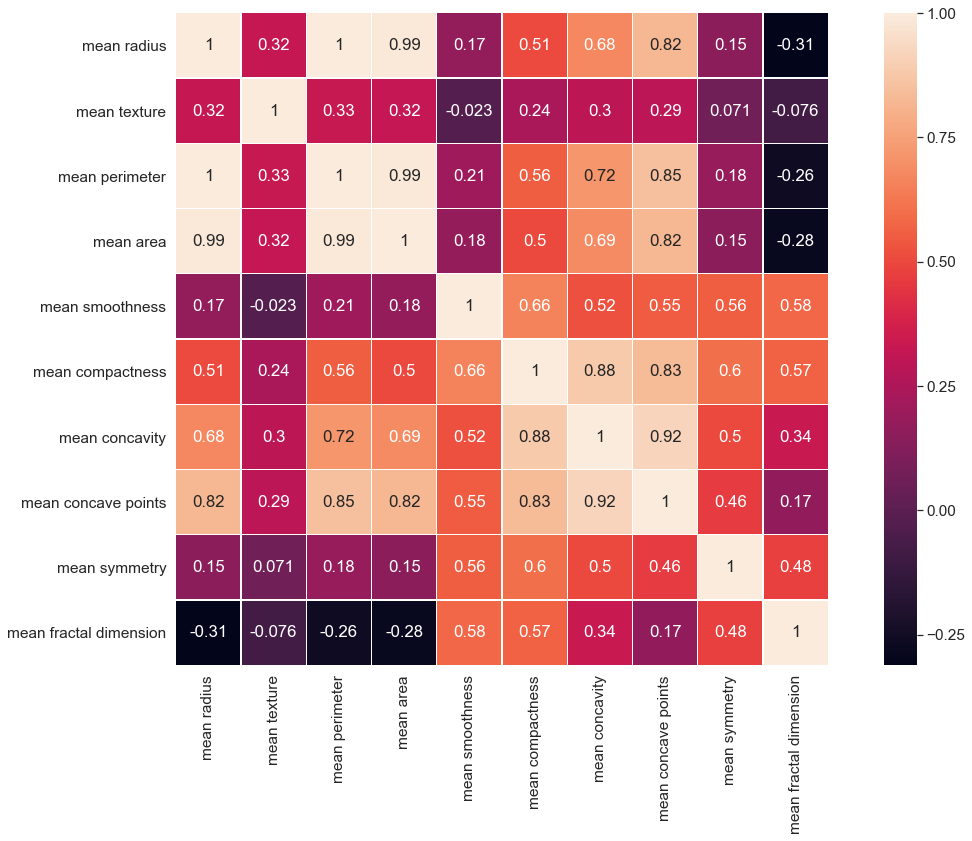

In [20]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.4)
sns.heatmap(df[features_mean].corr(),linewidths=0.2,square=True,linecolor='white',annot=True)
plt.show()

In [21]:
# m=1 ,b=0
df['target']=1-df['target']
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [22]:
features_mean1=list(df.columns[0:6])

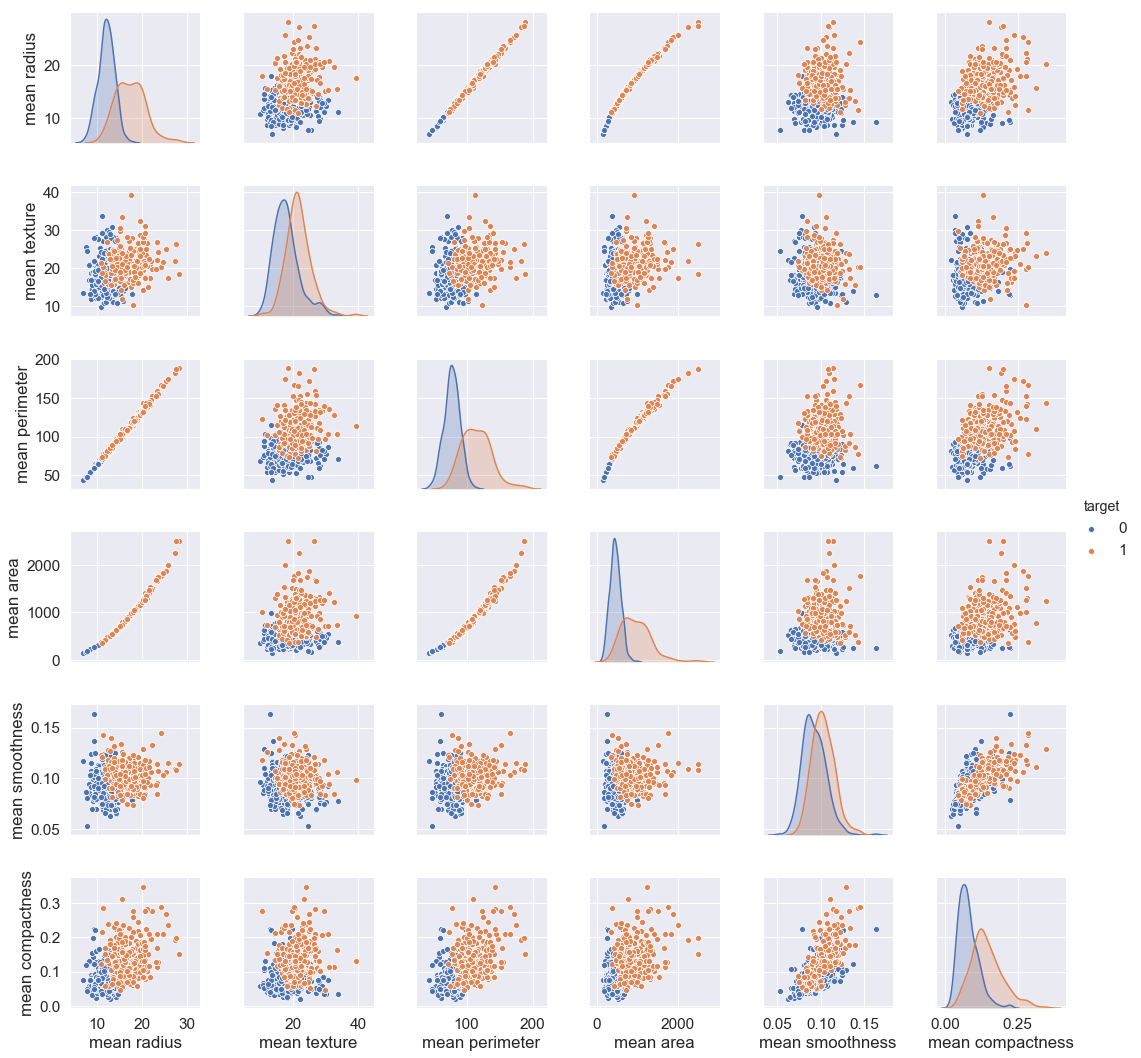

In [23]:
sns.pairplot(df,hue='target',vars=features_mean1)
plt.show()

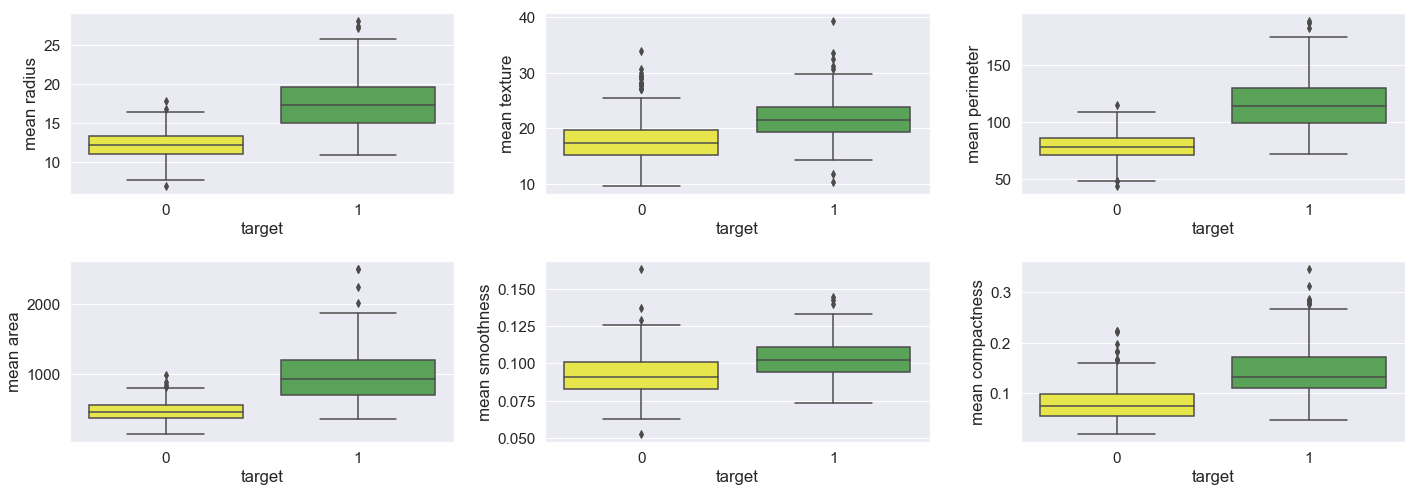

In [24]:
plt.figure(figsize=(20,10))
for i, feature in enumerate(features_mean1):
    rows = int(len(features_mean1)/2)
    
    plt.subplot(rows, 3, i+1)
    
    sns.boxplot(x='target', y=feature, data=df, palette="Set1_r")

plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [26]:
X=df.drop('target',axis=1)
y=df['target']

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# SVC without Normalised data

In [28]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
svc_score=cross_val_score(svc,X,y,cv=5)
svc_accuracy=accuracy_score(svc_pred,y_test)

print("SVC acuracy :{0:.2%}".format(svc_accuracy))
print("Cross validation Score : {0:.2%}".format(np.mean(svc_score)))

SVC acuracy :63.16%
Cross validation Score : 62.74%


In [29]:
# accuracy is very low. to improve score let's normalize data

# SVC with Normalized data

SVC acuracy :97.08%
Cross validation Score : 97.54%
[[105   3]
 [  2  61]]


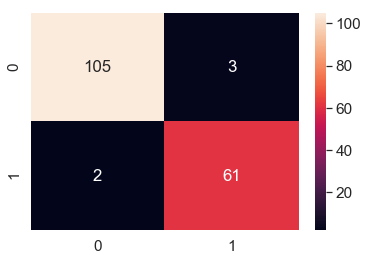

             precision    recall  f1-score   support

     Benign       0.98      0.97      0.98       108
  Malignant       0.95      0.97      0.96        63

avg / total       0.97      0.97      0.97       171



In [30]:
X_norm=df.drop('target',axis=1)

sc2=StandardScaler()
sc2.fit(X_norm)
X_norm=sc2.transform(X_norm)

from sklearn.cross_validation import train_test_split
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm,y, test_size=0.3, random_state=42)

from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train_norm,y_train)
svc_pred=svc.predict(X_test_norm)
svc_score=cross_val_score(svc,X_norm,y,cv=5)
svc_accuracy=accuracy_score(svc_pred,y_test)

print("SVC acuracy :{0:.2%}".format(svc_accuracy))
print("Cross validation Score : {0:.2%}".format(np.mean(svc_score)))

cm=confusion_matrix(y_test,svc_pred)
print(cm)

# if you don't put fmt='g' you will get scientific notations
sns.heatmap(cm,fmt='g',annot=True)
plt.show()

traget_names=['Benign','Malignant']
print(classification_report(y_test, svc_pred,target_names=traget_names ))

# Hyper Tune SVC params

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid={'C':[0.1,10,100,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','linear']}
grid=GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train_norm,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [35]:
grid_pred=grid.predict(X_test_norm)

SVC acuracy :98.25%
[[107   1]
 [  2  61]]


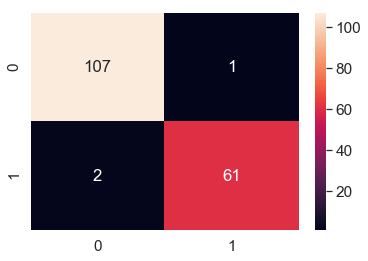

             precision    recall  f1-score   support

     Benign       0.98      0.99      0.99       108
  Malignant       0.98      0.97      0.98        63

avg / total       0.98      0.98      0.98       171



In [36]:
grid_accuracy=accuracy_score(grid_pred,y_test)

print("SVC acuracy :{0:.2%}".format(grid_accuracy))

cm=confusion_matrix(y_test,grid_pred)
print(cm)
sns.heatmap(cm,fmt='g',annot=True)
plt.show()

traget_names=['Benign','Malignant']
print(classification_report(y_test, grid_pred,target_names=traget_names ))

SVC acuracy :98.25%
Cross validation Score : 97.54%
[[107   1]
 [  2  61]]


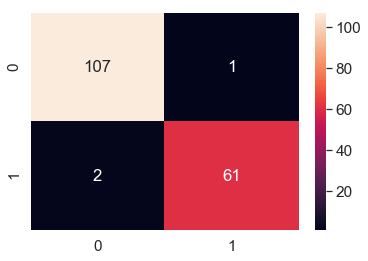

             precision    recall  f1-score   support

     Benign       0.98      0.99      0.99       108
  Malignant       0.98      0.97      0.98        63

avg / total       0.98      0.98      0.98       171



In [37]:
svc2=SVC(C= 0.1, gamma= 1, kernel= 'linear')
svc2.fit(X_train_norm,y_train)
svc2_pred=svc2.predict(X_test_norm)
svc2_score=cross_val_score(svc2,X_norm,y,cv=5)
svc2_accuracy=accuracy_score(svc2_pred,y_test)

print("SVC acuracy :{0:.2%}".format(svc2_accuracy))
print("Cross validation Score : {0:.2%}".format(np.mean(svc2_score)))

cm2=confusion_matrix(y_test,svc2_pred)
print(cm2)

# if you don't put fmt='g' you will get scientific notations
sns.heatmap(cm2,fmt='g',annot=True)
plt.show()

traget_names=['Benign','Malignant']
print(classification_report(y_test, svc2_pred,target_names=traget_names ))

In [39]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [49]:
# red: negative class imp features
# blue: +ve class imp features

[15 19 18  5  9 11 26  6 10  7 21 28]


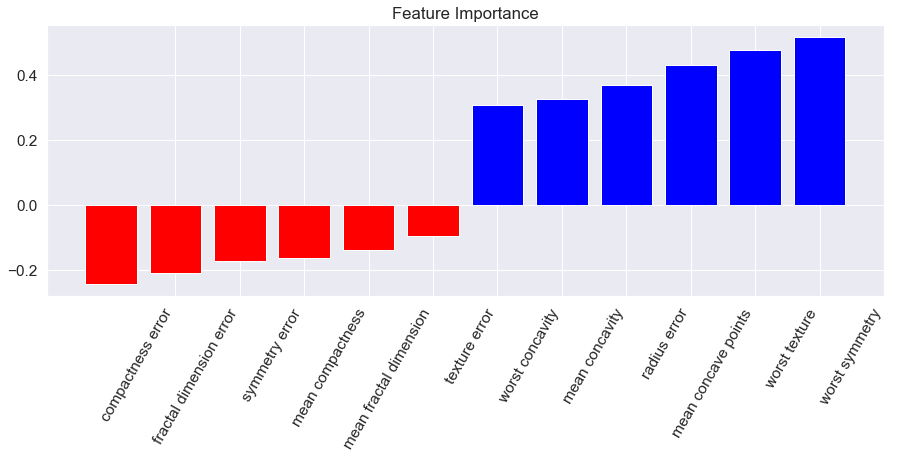

In [52]:

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=6):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.title('Feature Importance')
 plt.show()

plot_coefficients(svc2,X_train.columns)

SGD accuracy on Test data: 94.15%
Cross validation score: 88.55%


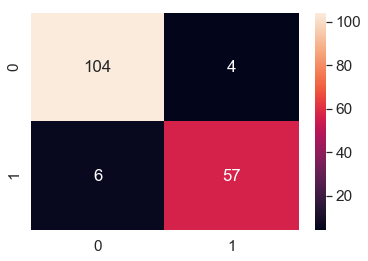

             precision    recall  f1-score   support

     Benign       0.95      0.96      0.95       108
  Malignant       0.93      0.90      0.92        63

avg / total       0.94      0.94      0.94       171



In [47]:
# STGD : gives different results every time. I am going to leave this one for later stage to study more

from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()
sgd.fit(X_train,y_train)
sgd_pred=sgd.predict(X_test)
sgd_score=cross_val_score(sgd,X,y,cv=5)

sgd_accuracy=accuracy_score(sgd_pred,y_test)

print("SGD accuracy on Test data: {0:.2%}".format(sgd_accuracy))
print("Cross validation score: {0:.2%}".format(np.mean(sgd_score)))

cm=confusion_matrix(y_test,sgd_pred)
sns.heatmap(cm,fmt='g',annot=True)
plt.show()

traget_names=['Benign','Malignant']
print(classification_report(y_test, sgd_pred,target_names=traget_names ))

In [ ]:
# here type 2 errors are 0 which is ideal but this model gives diffrent results in every run

In [ ]:
len(y_test)

In [48]:
# Connect notebook and download JS files.
# corelation of PCA components on attributes
import plotly
plotly.offline.init_notebook_mode(connected=True)
data_plot=go.Heatmap(z=pca.components_,x=dt.feature_names,y=['PC1','PC2','PC3'],colorscale='Viridis')
plotly.offline.iplot([data_plot],filename='heatmap')